In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [2]:
x_train = pd.read_pickle('../data/titanic_x_train.pkl')
y_train = pd.read_pickle('../data/titanic_y_train.pkl')

x_valid = pd.read_pickle('../data/titanic_x_valid.pkl')
y_valid = pd.read_pickle('../data/titanic_y_valid.pkl')

## Нормализация признаков

In [3]:
from sklearn.preprocessing import MinMaxScaler

'''
SVM чувствительны к ненормализованным данным 
''' 

scaler = MinMaxScaler()
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0
317,1,24.000000,1,0,26.0000,0,0,1,0,1,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
406,0,34.000000,1,0,21.0000,0,0,1,0,1,0
743,1,21.000000,2,2,262.3750,1,0,0,1,0,0


In [4]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0
317,1,0.296306,0.125,0.000000,0.050749,0,0,1,0,1,0
3,1,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1
406,0,0.421965,0.125,0.000000,0.040989,0,0,1,0,1,0
743,1,0.258608,0.250,0.333333,0.512122,1,0,0,1,0,0


In [6]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x_valid[cols_for_scale] = scaler.fit_transform(x_valid[cols_for_scale])
x_valid.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
710,0,0.411417,0.25,0.2,0.058107,1,0,0,0,0,1
440,0,0.429956,0.00,0.0,0.040019,0,0,1,0,1,0
841,0,0.273194,0.00,0.0,0.030205,0,0,1,0,0,1
721,1,0.073678,0.00,0.2,0.125774,0,0,1,0,1,0
40,1,0.187687,0.25,0.0,0.042846,1,0,0,0,0,1
291,1,0.358700,0.00,0.0,0.300524,0,0,1,1,0,0
301,1,0.411417,0.00,0.0,0.029538,0,1,0,0,0,1
334,0,0.216189,0.50,0.0,0.068604,0,0,1,0,0,1
209,1,0.216189,0.00,0.0,0.029538,0,1,0,0,0,1


In [8]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.420932,0.107623,0.081614,0.123024,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.185043,0.200417,0.167582,0.166092,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.315947,0.000000,0.000000,0.030094,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.411417,0.000000,0.000000,0.058107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.501211,0.250000,0.200000,0.119414,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Сохранение и загрузка модели нормализации

In [9]:
import joblib

joblib.dump(scaler, '../scaler/titanic_min_max_scaler.pkl')

['../scaler/titanic_min_max_scaler.pkl']

In [10]:
scaler = joblib.load('../scaler/titanic_min_max_scaler.pkl')

## SVC

In [11]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [12]:
y_pred = clf.predict(x_valid)
y_pred_train = clf.predict(x_train)

## Accuracy

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_pred)

0.8026905829596412

In [14]:
accuracy_score(y_pred_train, y_train)

0.8158682634730539

## Тюнинг модели SVC

In [15]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [16]:
accuracy_valid = []
accuracy_train = []

'''
Параметр C штрафует за ошибку классификации. 
По умолчанию равен 1.
'''

for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
    print(f'C = {val}\n\tacc_valid - {acc_valid}\n\tacc_train - {acc_train}\n')

C = 0.01
	acc_valid - 0.600896860986547
	acc_train - 0.6212574850299402

C = 0.01778279410038923
	acc_valid - 0.600896860986547
	acc_train - 0.6212574850299402

C = 0.03162277660168379
	acc_valid - 0.7802690582959642
	acc_train - 0.7889221556886228

C = 0.05623413251903491
	acc_valid - 0.7847533632286996
	acc_train - 0.7979041916167665

C = 0.1
	acc_valid - 0.8116591928251121
	acc_train - 0.812874251497006

C = 0.1778279410038923
	acc_valid - 0.8071748878923767
	acc_train - 0.812874251497006

C = 0.31622776601683794
	acc_valid - 0.8071748878923767
	acc_train - 0.812874251497006

C = 0.5623413251903491
	acc_valid - 0.8071748878923767
	acc_train - 0.812874251497006

C = 1.0
	acc_valid - 0.8026905829596412
	acc_train - 0.8158682634730539

C = 1.7782794100389228
	acc_valid - 0.7982062780269058
	acc_train - 0.8158682634730539

C = 3.1622776601683795
	acc_valid - 0.8071748878923767
	acc_train - 0.8158682634730539

C = 5.623413251903491
	acc_valid - 0.8071748878923767
	acc_train - 0.827844311

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'Accuracy')

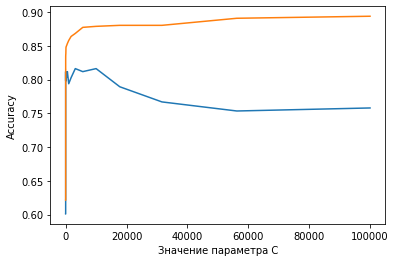

In [18]:
plt.plot(c_vals, accuracy_valid, label='valid')
plt.plot(c_vals, accuracy_train, label='train')

plt.xlabel('Значение параметра С')
plt.ylabel('Accuracy')